In [1]:
import functools
import pandas as pd
import numpy as np
import tqdm
import seaborn as sns
import xarray as xr
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import scipy.integrate as scint
import scipy.interpolate as scinterp
xr.set_options(keep_attrs=True)
import cmath

from Functions import *

In [2]:
b=((2*np.pi)/lambda_355)*(0.5e-2)**2
omega0 = np.sqrt(lambda_355 * b / (2* np.pi))
zR = b / 2     # [m] Rayleigh Range




pulse_params = {'b' : b,            # [m] confocal parameter
            'energy' : 15e-3,       # [J] single pulse energy original
            'duration' : 7e-9,       # [s] single pulse length
            'PXe':300,
            'dk':0}    
harm_params = {'alpha' : 8.20839154e-48, #value from fit 'alpha' : 8.20839154e-48,
            'chi3' : 1.5e-35}   #value from fit: 1.5e-35

zstart = -0.2
zstop =0.2
zsamples = 1000
zrange = (zstart, zstop)
z = np.array(np.linspace(zstart, zstop, zsamples,dtype = np.longdouble))

rstop = 10*omega0
rsamples = 10000
r = np.linspace(0,rstop,rsamples,dtype = np.longdouble)


sol_params_WA = {'func': curly_GBWA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_WA = {**pulse_params, **harm_params, **sol_params_WA}


In [3]:
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

In [4]:
bsamples = 5
brange = (f_to_b(0.5e-2,20e-2),1)# confocal perameter [m] (corresponds to f=20cm to f=100cm)
bs = np.linspace(brange[0], brange[1], bsamples)
bscan = xr.DataArray(bs,
                     dims = 'b',
                     attrs = {'units': 'm',
                              'long_name': "Confocal parameter"})
single_func = functools.partial(calc_118_and_fluor,
                                zrange=zrange,
                                init_vals=[1e-10,1e-10,1e-10],
                                t_eval=z)

dk_samples = bsamples
dk_range = brange
dk =np.linspace(2/bs[-1],2/bs[1],dk_samples)
dk_scan = xr.DataArray(dk,
                     dims = 'dk',
                     attrs = {'units': 'm^-1',
                              'long_name': "Phase Mismatch"})

B_scan = scan_builder(single_func, params_WA, [bscan,dk_scan])

In [5]:
scanned_WA = B_scan(params=params_WA)

0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:98: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I2 = scint.quad(Ref2,z0,z, weight = 'sin', wvar =dk, limit = 10000)
/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:98: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I2 = scint.quad(Ref2,z0,z, weight = 'sin', wvar =dk, limit = 10000)
/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672
0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672
0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0


In [6]:
# scanned_WA.coords

In [7]:
# data_selection = {'variable': '118 signal'}
# scanned_WA.sel(data_selection)


In [8]:
# scanned_WA.data[:,:,0]

In [9]:
# scanned_WA.data[0][:,0]

In [10]:
# scanned_WA.b.data

In [11]:
WA_Name='SaveTest_WA'
NA_Name='Savetest_NA'


In [12]:
scanned_WA

<xarray.DataArray (dk: 5, b: 5, variable: 2)>
array([[[2.60463068e+25, 0.00000000e+00],
        [2.72533638e+29, 0.00000000e+00],
        [7.03102929e+31, 0.00000000e+00],
        [9.36064711e+31, 0.00000000e+00],
        [7.25558533e+31, 0.00000000e+00]],

       [[1.82130342e+25, 0.00000000e+00],
        [1.03328470e+31, 0.00000000e+00],
        [1.27891752e+32, 0.00000000e+00],
        [1.22018106e+32, 0.00000000e+00],
        [8.19922173e+31, 0.00000000e+00]],

       [[9.38327846e+24, 0.00000000e+00],
        [4.46226143e+31, 0.00000000e+00],
        [1.75873824e+32, 0.00000000e+00],
        [1.31420052e+32, 0.00000000e+00],
        [7.75770971e+31, 0.00000000e+00]],

       [[2.53753379e+24, 0.00000000e+00],
        [9.17104875e+31, 0.00000000e+00],
        [1.98175970e+32, 0.00000000e+00],
        [1.18710056e+32, 0.00000000e+00],
        [6.08589547e+31, 0.00000000e+00]],

       [[2.30164722e+20, 0.00000000e+00],
        [1.35820456e+32, 0.00000000e+00],
        [1.87375860e+32, 0.00000000e+00],
        [8.82364701e+31, 0.00000000e+00],
        [3.75180228e+31, 0.00000000e+00]]], dtype=float128)
Coordinates:
  * dk        (dk) float64 2.0 3.498 4.996 6.493 7.991
  * b         (b) float64 0.0003616 0.2503 0.5002 0.7501 1.0
  * variable  (variable) <U19 '118 signal' 'Fluorescence signal'
Attributes: (12/19)
    energy:        0.015
    duration:      7e-09
    PXe:           300
    alpha:         8.20839154e-48
    chi3:          1.5e-35
    func:          curly_GBWA
    ...            ...
    rsamples:      10000
    dk:            2.0
    units:         Arb.
    zrange:        (-0.2, 0.2)
    init_vals:     [1e-10, 1e-10, 1e-10]
    t_eval:        [-0.2        -0.1995996  -0.1991992  -0.1987988  -0.198398...

In [13]:
np.save(WA_Name+".npy",scanned_WA.data)

In [14]:
# plt.scatter(scanned_WA.b.data,scanned_WA.data[0][:,0])
# plt.xlabel('Confocal Perameter [m]')
# plt.ylabel('118 Signal')
# plt.show()





In [15]:
# dk

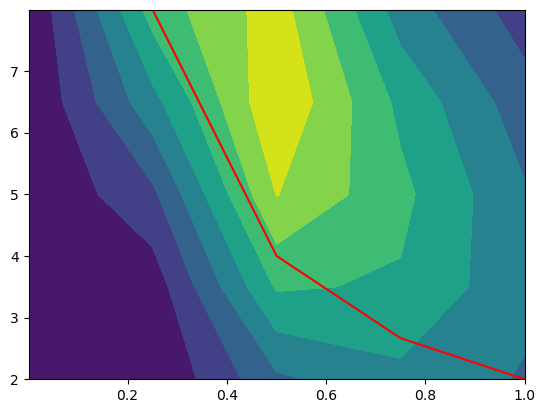

In [16]:
b_, dk_ = np.meshgrid(scanned_WA.b.data, scanned_WA.dk.data)
plt.contourf(b_,dk_,scanned_WA.data[:,:,0])
plt.plot(scanned_WA.b.data,2/scanned_WA.b.data,color='r')
plt.ylim(dk[0],dk[-1])
plt.savefig(WA_Name)

In [17]:
# opt_b_index = np.where(scanned_WA.data[:,0] == max(scanned_WA.data[:,0]))[0][0]
# print('optimal b value: ',scanned_WA.b.data[opt_b_index])


In [18]:


sol_params_NA = {'func': curly_GBNA,
              'initial_vals': (nonzero, nonzero),
              'zstart': zstart,
              'zstop': zstop,
              'zsamples': zsamples,
              'z': z,
              'r': r,
              'rstop': rstop,
              'rsamples': rsamples}

params_NA = {**pulse_params, **harm_params, **sol_params_NA}

scan_NA = scan_builder(single_func, params_NA, [bscan,dk_scan])

In [19]:
scanned_NA = scan_NA(params=params_NA)

0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:98: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I2 = scint.quad(Ref2,z0,z, weight = 'sin', wvar =dk, limit = 10000)
/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:98: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I2 = scint.quad(Ref2,z0,z, weight = 'sin', wvar =dk, limit = 10000)
/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672


/Users/oliverquinonez/118-Project/Functions.py:108: IntegrationWarning: The integral is probably divergent, or slowly convergent.
  I1 = scint.quad(Imf1,z0,z, weight = 'sin', wvar = dk,limit=10000)


0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0
0.0003616003262101672
0.25027120024465765
0.5001808001631051
0.7500904000815525
1.0


In [20]:

np.save(NA_Name+".npy",scanned_NA)

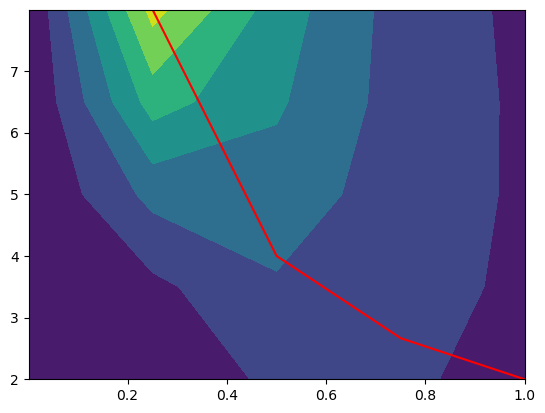

In [21]:
b_, dk_ = np.meshgrid(scanned_NA.b.data, scanned_NA.dk.data)
plt.contourf(b_,dk_,scanned_NA.data[:,:,0])
plt.plot(scanned_NA.b.data,2/scanned_NA.b.data,color='r')
plt.ylim(dk[0],dk[-1])
plt.savefig(NA_Name)

In [22]:
(30/(1-bs[0]))*( f_to_b(0.5e-2,100e-2)-f_to_b(0.5e-2,20e-2))

0.26045173339993555

In [23]:
10/( f_to_b(0.5e-2,100e-2)-f_to_b(0.5e-2,20e-2))

1152.2615550331582

In [24]:
1152.2615550331582*(1-bs[0])

1151.8448968789787